# Measuring the viewing angle of GW170817 with electromagnetic and gravitational waves

**Daniel Finstad<sup>1</sup>, Soumi De<sup>1</sup>, Duncan A. Brown<sup>1</sup>, Edo Berger<sup>2</sup>, Christopher M. Biwer<sup>1,3</sup>**

**<sup>1</sup>Department of Physics, Syracuse University, Syracuse, NY 13244, USA**

**<sup>2</sup>Harvard-Smithsonian Center for Astrophysics, Cambridge, Massachusetts 02139, USA**

**<sup>3</sup>Applied Computer Science (CCS-7), Los Alamos National Laboratory, Los Alamos, NM, 87545, USA**

## License

![Creative Commons License](https://i.creativecommons.org/l/by-sa/3.0/us/88x31.png "Creative Commons License")

This work is licensed under a [Creative Commons Attribution-ShareAlike 3.0 United States License](http://creativecommons.org/licenses/by-sa/3.0/us/).

## Introduction

This notebook is a companion to the paper posted at [arxiv:1804.04179](https://arxiv.org/abs/1804.04179). It demonstrates how to read and use our posterior probability density files from the MCMC and shows how to reconstruct Figure 1 in the paper from the raw data.

We encourage use of these data in derivative works. If you use the material provided here, please cite the paper using the reference:
```
bibtex key here
```

The data provided contain the thinned posterior samples from the MCMC chains used to produce the posterior probability density plots shown in Figure 1. These data are stored in the files:

 1. [gw_only_posteriors.hdf](https://github.com/sugwg/gw170817-inclination-angle/blob/master/gw_only_posteriors.hdf)  contains the posterior samples from the MCMC where we only use the gravitational-wave data.
 2. [gw_and_skyloc_posteriors.hdf](https://github.com/sugwg/gw170817-inclination-angle/blob/master/gw_and_skyloc_posteriors.hdf) containes the posterior samples from the MCMC where we use the gravitational-wave data and fix the sky location of GW170817 to RA = 197.450374, Dec = -23.381495 from [Soares-Santos et al. (2017).](http://iopscience.iop.org/article/10.3847/2041-8213/aa9059/meta)

 3. [gw_skyloc_and_dist_posteriors.hdf](https://github.com/sugwg/gw170817-inclination-angle/blob/master/gw_skyloc_and_dist_posteriors.hdf) contains the posterior samples from the MCMC where we use the gravitational-wave data, fix the sky location of GW170817 to RA = 197.450374, Dec = -23.381495 from [Soares-Santos et al., (2017)](http://iopscience.iop.org/article/10.3847/2041-8213/aa9059/meta), and use a Gaussian prior on the luminosity distance taken from [Cantiello et al. (2018).](http://iopscience.iop.org/article/10.3847/2041-8213/aaad64/meta)

The results used in the paper were generated with the [PyCBC v1.9.4 release.](https://github.com/gwastro/pycbc/releases/tag/v1.9.4)

## Runing this notebook in a Docker container

This notebook can be run from a PyCBC Docker container, or a machine with PyCBC installed. Instructions for [downloading the docker container](http://gwastro.github.io/pycbc/latest/html/docker.html) are available from the [PyCBC home page.](https://pycbc.org/) To start a container with instance of Jupyter notebook, run the commands
```sh
docker pull pycbc/pycbc-el7:v1.9.4
docker run -p 8888:8888 --name pycbc_notebook -it pycbc/pycbc-el7:v1.9.4 /bin/bash -l
```
Once the container has started, this git repository can be downloaded with the command:
```sh
git clone https://github.com/sugwg/gw170817-inclination-angle.git
```
The notebook server can be started inside the container with the command:
```sh
jupyter notebook --ip 0.0.0.0 --no-browser
```
You can then connect to the notebook server at the URL printed by ``jupyter``. Navigate to the directory `gw170817-inclination-angle` in the cloned git repository and open [data_release_companion.ipynb](https://github.com/sugwg/gw170817-inclination-angle/blob/master/data_release_companion.ipynb) (this notebook).

## Set up notebook

In [1]:
import warnings
warnings.filterwarnings('ignore')
import h5py
from IPython.display import Image
%config InlineBackend.figure_format = 'retina'

## Using the posterior probability data

The posterior data is stored as flattened arrays in the `samples` group of the hdf files in this repository. The parameter names for each of the arrays that exist in a file can be accessed through a `variable_args` attribute of the file:

In [2]:
fp = h5py.File("gw_only_posteriors.hdf", "r")
print fp.attrs['variable_args']
fp.close()

['tc' 'ra' 'dec' 'mass1' 'mass2' 'coa_phase' 'inclination' 'polarization'
 'distance' 'spin1z' 'spin2z']


Each of these parameter names can then be used to access that parameter's data in the `samples` group of the file. For example, the inclination angle posterior samples (in radians) from our run using the GW signal as well as EM sky location and Gaussian distance prior can be accessed this way:

In [3]:
fp = h5py.File("gw_skyloc_and_dist_posteriors.hdf", "r")
inc_samples = fp['samples/inclination'][:]
fp.close()
print inc_samples

[2.74223087 2.58393159 2.49176962 ... 2.53901635 2.61125559 2.45446383]


By default, the PyCBC software used to create these files stores the mass parameters only as `mass1` and `mass2`, but other mass parameters like chirp mass and mass ratio can be derived from these. For example, using the PyCBC toolkit:

In [4]:
from pycbc import conversions

fp = h5py.File("gw_and_skyloc_posteriors.hdf", "r")
mass1 = fp['samples/mass1'][:]
mass2 = fp['samples/mass2'][:]
fp.close()

mchirp = conversions.mchirp_from_mass1_mass2(mass1, mass2)
q = conversions.q_from_mass1_mass2(mass1, mass2)

print mchirp
print q

[1.19741915 1.19764339 1.19745038 ... 1.19744863 1.1974772  1.19743338]
[1.09369018 1.76305928 1.35133021 ... 1.35989104 1.26977907 1.07243915]


## Make Figure 1 plot

For Figure 1, we use a built-in PyCBC plotting script that handles formatting and any necessary parameter conversions. Below is an example that will plot the posteriors in the way they're shown in the figure. Some formatting differences may be present, but if you're running a development version of PyCBC then you can adjust these to your taste in the plotting code. Note that this can take up to 10 minutes to complete.

In [5]:
!pycbc_inference_plot_posterior --input-file gw_only_posteriors.hdf \
                                             gw_and_skyloc_posteriors.hdf \
                                             gw_skyloc_and_dist_posteriors.hdf \
                                --input-file-labels "GW only" "GW + EM skyloc" "GW + EM skyloc and distance" \
                                --output-file posterior_plot.png \
                                --plot-marginal --plot-contours --contour-percentiles 90 \
                                --parameters 'mchirp:$\mathcal{M}^{det}$' \
                                             'mchirp/(1+redshift):$\mathcal{M}^{src}$' \
                                              q chi_eff distance \
                                              'inclination*180/pi:$\iota$ (deg)' \
                                --mins 'inclination*180/pi':100 \
                                --verbose

/home/dbrown/src/pycbc/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters

2018-04-12 09:21:32,089 Loading parameters
2018-04-12 09:21:32,089 Reading input file gw_only_posteriors.hdf
2018-04-12 09:21:32,090 Loading samples
2018-04-12 09:21:32,124 Reading input file gw_and_skyloc_posteriors.hdf
2018-04-12 09:21:32,125 Loading samples
2018-04-12 09:21:32,157 Reading input file gw_skyloc_and_dist_posteriors.hdf
2018-04-12 09:21:32,158 Loading samples
2018-04-12 09:21:32,196 Plotting
/home/dbrown/src/pycbc/lib/python2.7/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
2018-04-12 0

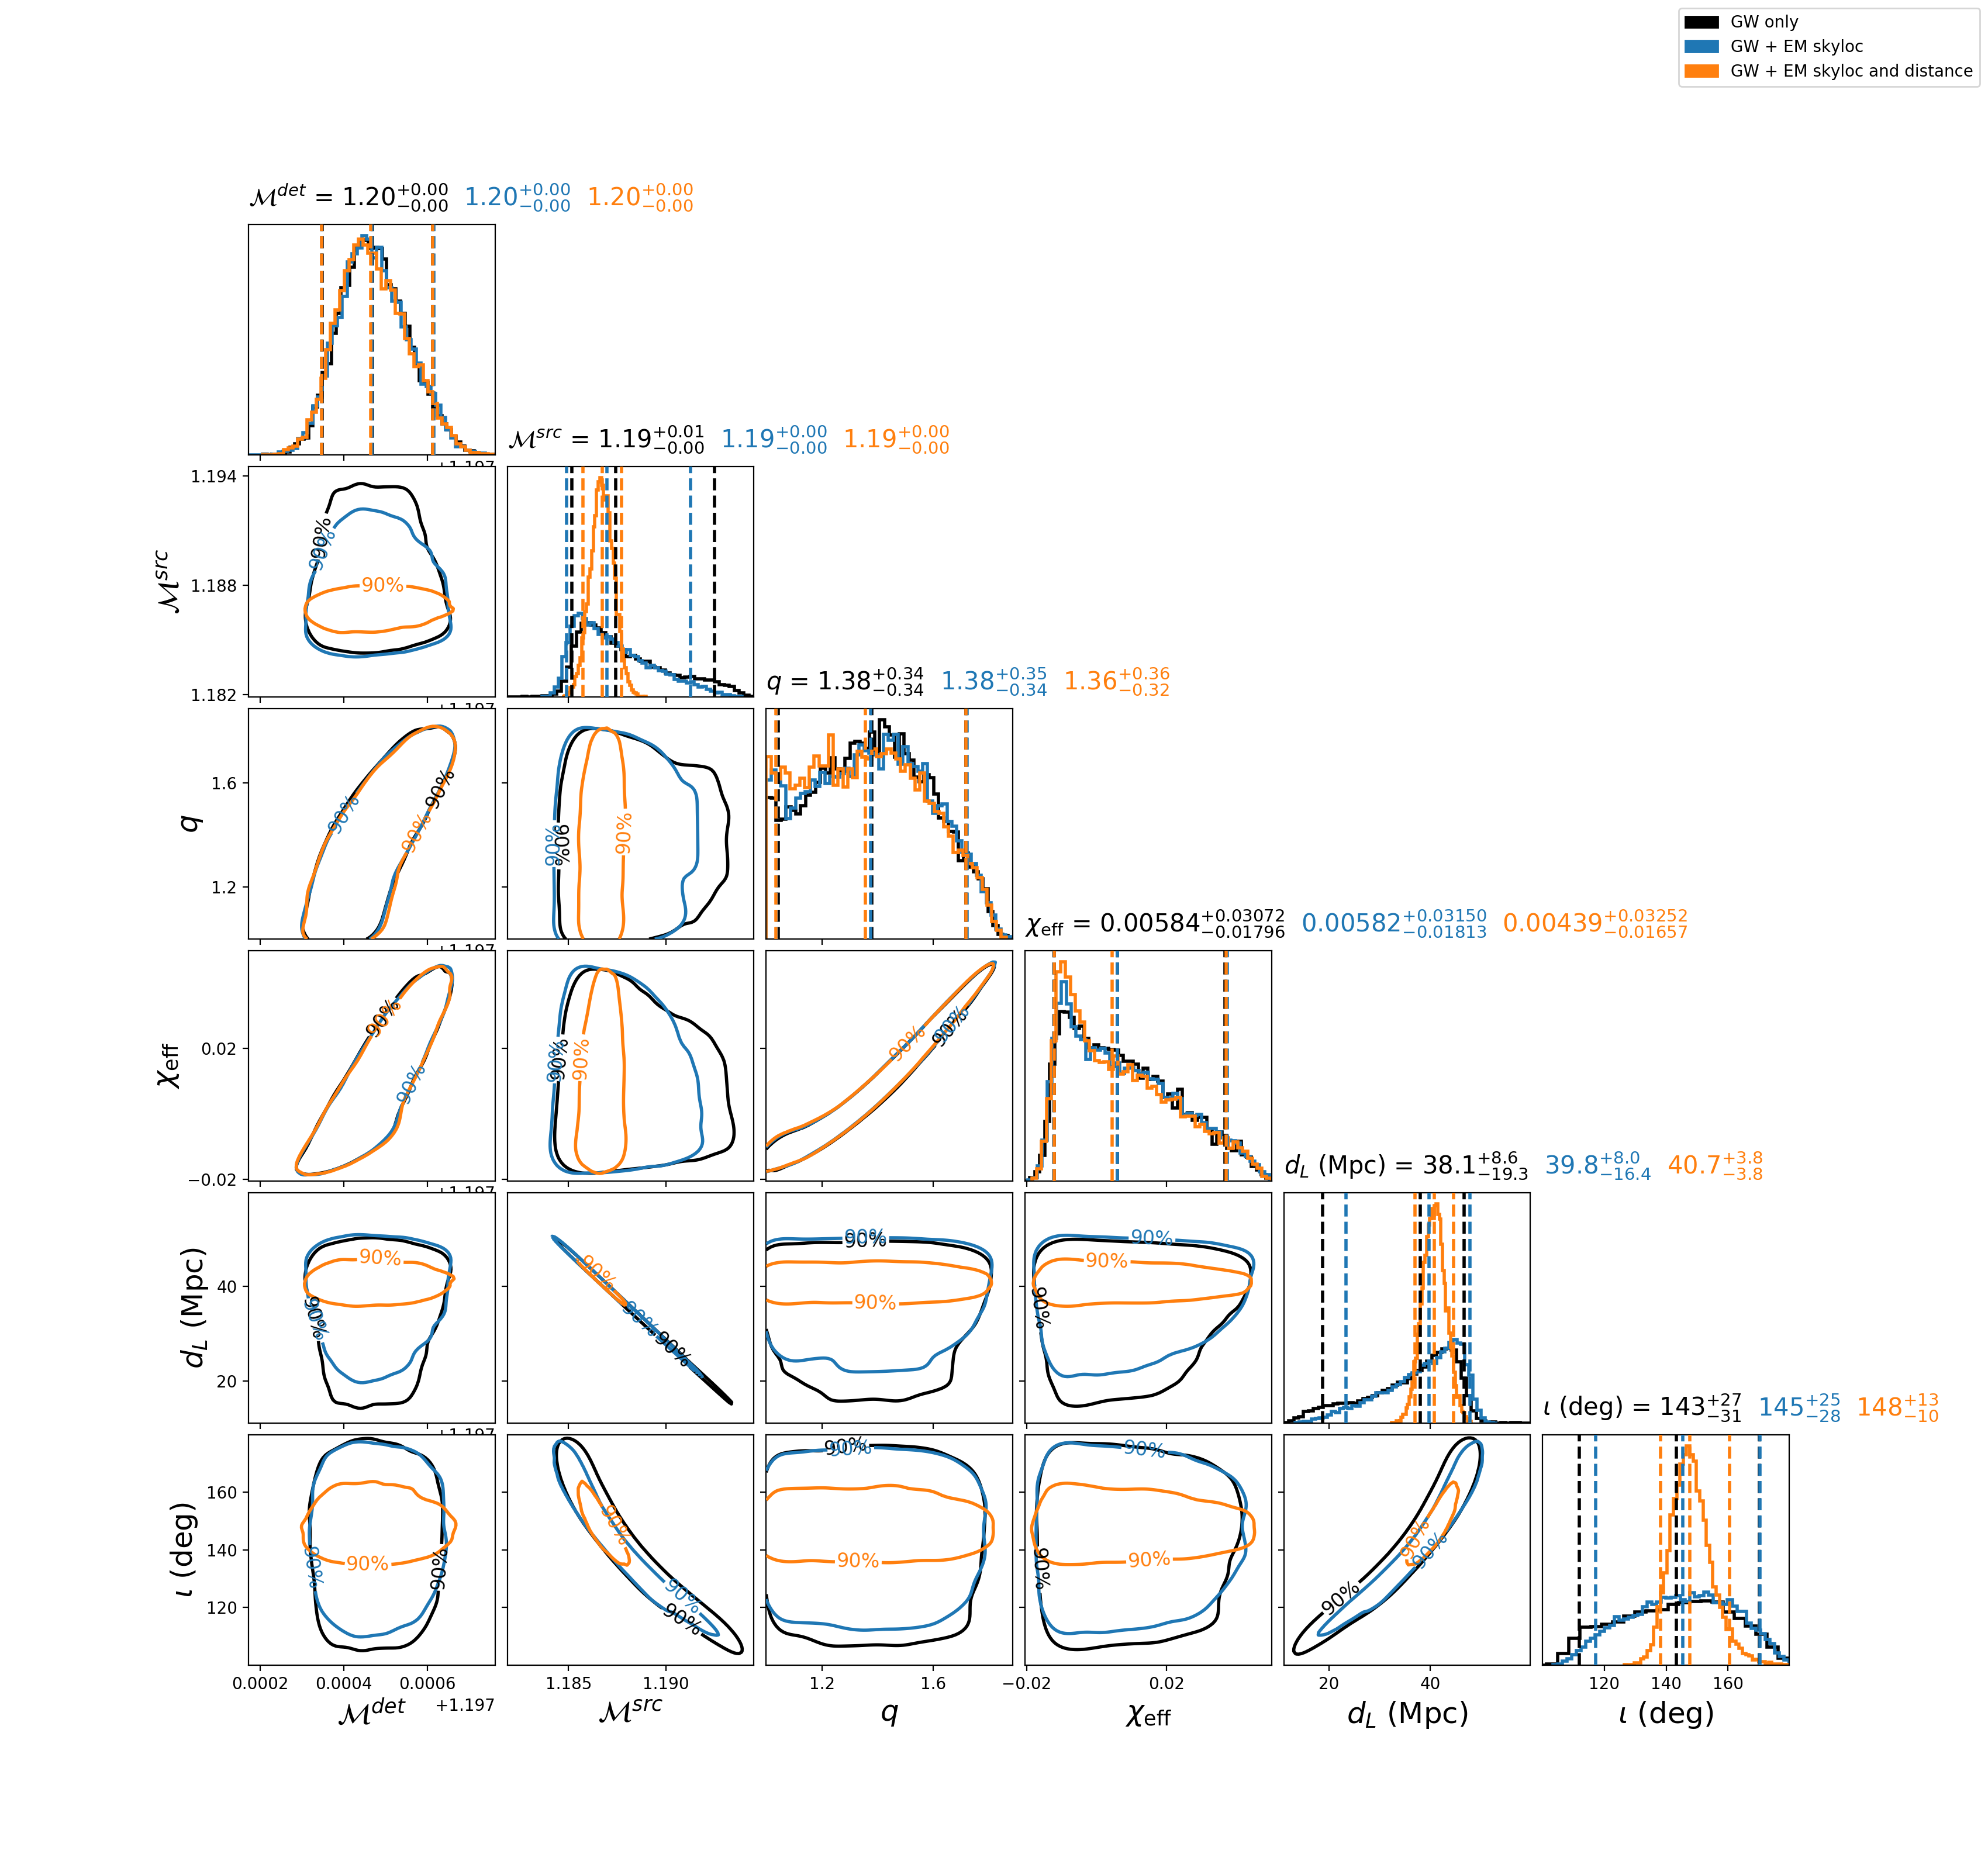

In [6]:
Image('posterior_plot.png')

## Acknowledgements

We thank Stefan Ballmer and Steven Reyes for useful discussions. We thank Alexander H. Nitz and Collin D. Capano for useful discussions on setting up this notebook.
We particularly thank Collin D. Capano for contributing to the development of PyCBC Inference; unfortunately, he did not wish to be an author of this work because of restrictions required by the LIGO Scientific Collaboration policies. 

### Funding

This work was supported by U.S. National Science Foundation awards PHY-1404395 (DAB, CMB), PHY-1707954 (DAB, SD, DF) and AST-1714498 (EB). Computational work was supported by Syracuse University and National Science Foundation award OAC-1541396. DAB, EB, and SD acknowledge the Kavli Institute for Theoretical Physics which is supported by the National Science Foundation award PHY-1748958. 

### Authors contributions:
Conceptualization, DAB and EB; Methodology, DAB, EB, CMB, SD, and DF; Software: CMB and CDC; Validation: SD; Formal Analysis: DF; Investigation: SD and DF; Resources: DAB; Data Curation: DAB and DF; Writing – Original Draft: DF; Writing – Review and Editing: DAB, EB, CMB, SD, and DF; Visualization: DF, CDC, AHN; Supervision: DAB; Project Administration: DAB; Funding Acquisition: EB, DAB.
